In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
# Assuming the dataset is in a CSV file named 'fraud_dataset.csv'
df = pd.read_csv('Fraud_check.csv')
df




,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Display the first few rows of the dataset
print(df.head())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [4]:
# Check for missing values and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
None


## Preprocess the Data

In [5]:
# Convert the 'taxable_income' variable into a binary target variable
df['Income_Category'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')



In [6]:
# Drop the original 'taxable_income' variable
df = df.drop('Taxable.Income', axis=1)




In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])



In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop('Income_Category', axis=1)
y = df['Income_Category']



In [9]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income_Category, Length: 600, dtype: int32

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,0,197422,2,1
9,1,0,155482,4,1
375,0,1,130935,2,0
523,0,0,42198,12,0
188,0,0,137569,10,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [13]:
X_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
399,0,2,74497,21,0
340,1,1,54437,21,1
148,0,1,197038,21,0
494,0,2,197045,13,1


In [14]:
y_train

145    0
9      0
375    0
523    0
188    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: Income_Category, Length: 480, dtype: int32

In [15]:
y_test

110    1
419    0
565    0
77     0
181    1
      ..
399    0
340    0
148    0
494    0
439    1
Name: Income_Category, Length: 120, dtype: int32

In [16]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [17]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [20]:


# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.775
Confusion Matrix:
[[93  1]
 [26  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



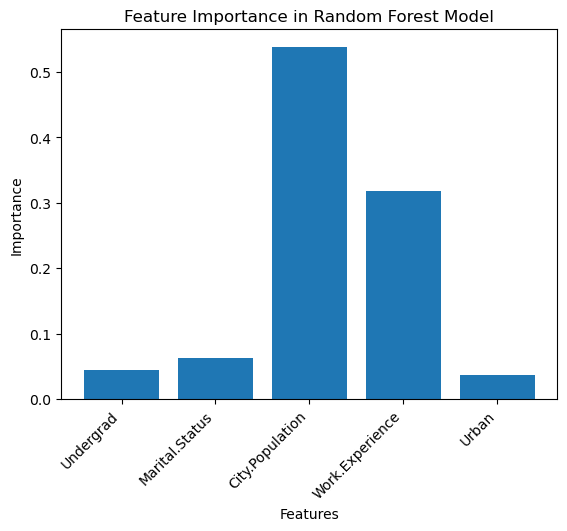

In [21]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a bar chart for feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()


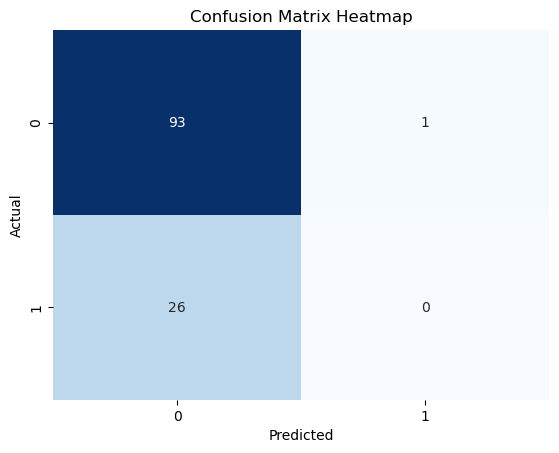

In [22]:
import seaborn as sns

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


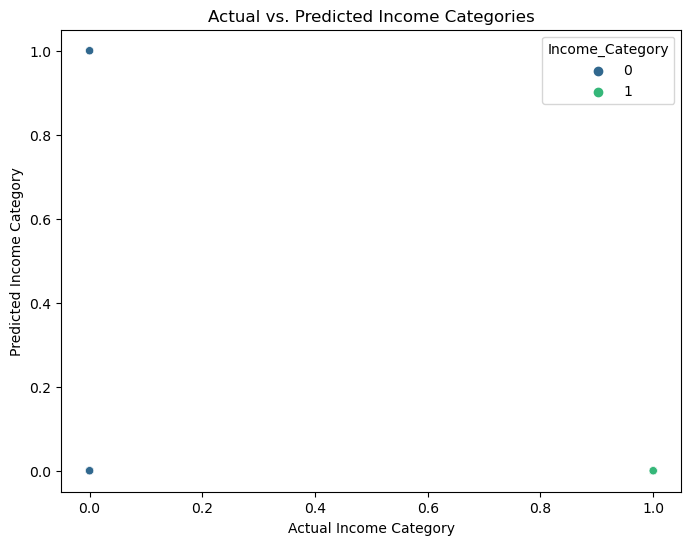

In [23]:
import seaborn as sns

# Create a scatter plot for actual vs. predicted income categories
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis')
plt.xlabel('Actual Income Category')
plt.ylabel('Predicted Income Category')
plt.title('Actual vs. Predicted Income Categories')
plt.show()


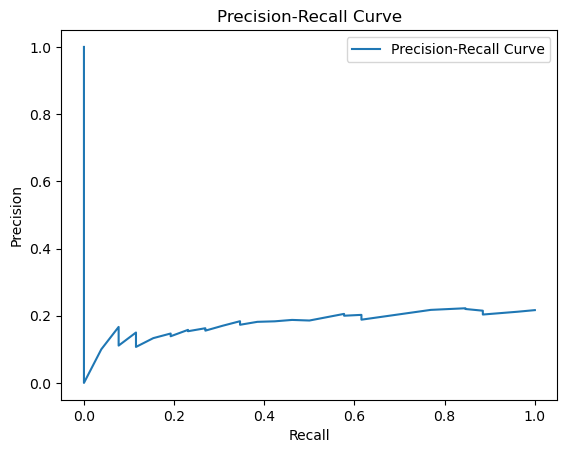

In [24]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


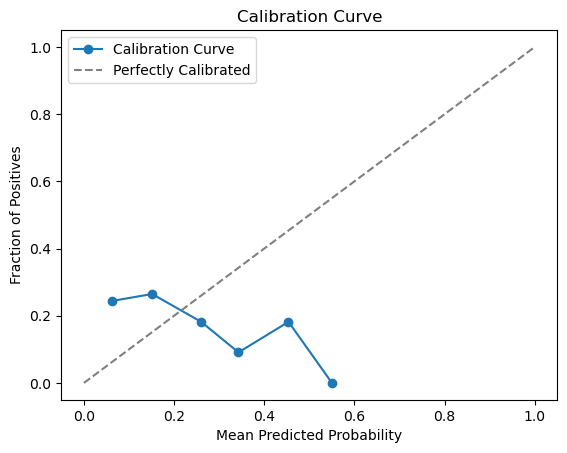

In [26]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, rf_model.predict_proba(X_test)[:, 1], n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
